<h1>Essential Concepts of Quantitative Finance</h1>
<i>As denoted in chapter 1 of A Gentle Introduction to Financial Theory With Python</i>

Note that the following are all examples of a "Two-State Economy", meaning that the uncertainty of some future

<h3><b>Terminology & Definitions</b></h3>

**Real Assets** - Things that are available for trade or purchase.

**Agents** - The members of an economy that perform trades, produce real assets, and consume them. An agent can be an individual or an institution.

**Time** - Economic activity takes place in <u>discrete points in time</u>. E.g. t $\in$ *0, 1, 2,... n*. The units of time are dependent on context. A *static economy* consists of two discrete points in time.

**Money** - Available in unlimited supply and infinitely divisible. Money is the *numeraire* of an economy, in that 1 unit of money is normalized to 1. The prices of all goods are expressed on that currency.

**Cash Flow** - The confluence of time and money. Investments are considered *cash outflows* while returns or paybacks are *inflows*. To indicate the points in time when cash flows happen, a time index is used: 
</br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
in the example, $C_{t=0} = -9.5$ and $C_{t=1} = 11.75$, or for short, $C_{t0} = -9.5$ and $C_{t1} = 11.75$. Cash flow series are represented by *tuples* and *lists*, like $(c_1, c_2)$.

**Return** - The return of an investment or project is the sum of all cash flows, $R = C_0 + C_1 + ... C_n$. The *Rate of Return* Is the return divided by cash outflows, $r = \frac{R}{|C_0|}$.

**Interest** - Earned on currency units or paid for borrowed money. The *price* paid to other agents for holding their capital. An *Interest Rate* is the return expected after 1 year of lending that money, $i = \frac{I}{|C_0|}$.

**Present Value (D)** - Having options for lending or depositing money leads to *opportunity costs* for investment in particular projects. To appropriately compare cash flows in one year with those of today, 
</br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
the present value needs to be calculated. This is accomplished by *discounting* using the fixed interest rate in the economy. Discounting can be modeled by function D:
$C_0 =  D(C_1) = \frac{C_1}{1 + i}$

In [5]:
i = .1 # Interest rate

def D(c1):
    return c1 / (i + 1)

D(11)

10.0

**Net Present Value (NPV)** - The sum of cash outflow today and the present value of the cash inflow in one year. A key determinant in whether an agent should invest in a project. 
$NPV(C) = C_0 + D(C_1)$ If the result is positive, this is more attractive than just depositing holdings into a bank. 

In [3]:
def NPV(c):
    return round(c[0] + D(c[1]), 4)

print(NPV((-10.5, 12,1)))
NPV((-10.5, 11))

0.4091


-0.5

**Uncertainty** - Cash inflows are as a rule uncertain, due to the influence of extraneous factors (e.g. weather, technological advancement). *states* of the economy in one year are comprised of all pertinent factors. In one given year, you could conceive of two different economic states; *up* and *down*. In this view, cashflows in that year are vectorized, like $c_1 \in \mathbb{R}^2$, comprised of two different values; $c^u_1,c^d_1 \in \mathbb{R}$, which represent the relevant cash flows per state of the economy. This can be represented by a *column vector*: 
</br>
</br>
$c_1 = 
         \begin{pmatrix}
           c^u_1 \\           
            c^d_1          
    \end{pmatrix}
$
</br>
</br>
Vectors carry some important operations, including *scalar multiplication*, *scalar addition*, and *linear combinations*. Here's an example of a dot product (matrix multiplication):
</br>
</br>
$\alpha \cdot c_1 + B = \alpha \cdot 
    \begin{pmatrix}
           c^u_1 \\           
            c^d_1          
    \end{pmatrix}
    =     
    \begin{pmatrix}
           \alpha \cdot c^u_1 + B \\           
            \alpha \cdot c^d_1 + B          
    \end{pmatrix}
$
</br>
</br>
And here's a *linear combination*:
</br>
</br>
$\alpha \cdot c_1 + B \cdot d_1 = \alpha \cdot 
    \begin{pmatrix}
           c^u_1 \\           
            c^d_1          
    \end{pmatrix}
    =     
    \begin{pmatrix}
           \alpha \cdot c^u_1 + B \cdot c^u_1 \\           
            \alpha \cdot c^d_1 + B  \cdot c^d_1         
    \end{pmatrix}
$
</br>
</br>
Consider the case of an investment project with $c_0 = -10$ and $c_1 = (20, 5)^T$, where T stands for the transposition of the vector $c_1$, that is, rotated from a row vector into a column: 

In [2]:
import numpy as np

c0 = -10  # State at present (10 unit outflow)
c1 = np.array((20, 5)) # (inflow of 20 in up state, inflow of 5 in down)

c = (c0, c1) # Combines initial state with uncertain states in one year

print("Transformation: ", c1, "* 1.5 + 2 = ", c1 * 1.5 + 2)  # A linear transformation of inflow vector by scalar multiplication. (broadcasting)

print("Combination: ", c1, "+ 1.5 * [10, 4] = ", c1 + 1.5 * np.array([10, 4])) # A linear combination of two arrays

Transformation:  [20  5] * 1.5 + 2 =  [32.   9.5]
Combination:  [20  5] + 1.5 * [10, 4] =  [35. 11.]


**Risk** - The *frequentist* view of risk is that probabilities for a given state to arise are calculated based on the frequency of their observation divided by the total number of experiments run; $p = \frac{occurences}{experiments}$. In modelling contexts, probabilities for all possible states are given *a priori*. 

**Probability Measure** - A function which can be applied to all events in the event space to determine the likelihood of their comparative occurence. The [countable additivity](https://www.statisticshowto.com/countable-additivity/) of all event probabilities must equal 1. 
</br> Formally defined, $P: \mathcal{p}(\{\textit{u}, \textit{d}\}) \rightarrow \mathbb{R}_{1 \geq 0}$, maps all elements of the power set of $\{\textit{u}, \textit{d}\}$ $-$ with 
$\mathcal{p}(\{\textit{u}, \textit{d}\}) = \{\phi, \{\textit{u}\}, \{\textit{d}\}, \{\textit{u}, \textit{d}\} \}$ $-$ to the unit interval, that is, $[0,1]$. 

The set $\{\textit{u}, \textit{d}\}$ in this context is called the *state space*, which is symbolized by $\Omega$, while the set $\{\Omega, \mathcal{P}(\Omega), P\}$ is called the [*probability space* or probability triple](https://en.wikipedia.org/wiki/Probability_space).

The probability function $P$ which represents the probability measure must satisfy the following criteria:
</br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. $P(\phi) = 0$
</br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. $0 \leq P(\omega), \omega \in \Omega \leq 1$
</br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. $P(\textit{u}) + P(\textit{d}) = 1$ (in the case of a two-state economy, where $\textit{u}$ and $\textit{d} are the only possible states)

In the simple model economy with two states only, it is convenient to define $p \equiv  P(u)$ (the optimistic outlook), and thusly to define $P(d)$ as $1-p$.

There are two types of uncertainty the probability measure models, risk and uncertainty. Risk in general refers to a situation in which a full probability distribution over future states of the economy is (assumed to be) known. Ambiguity refers to situations in which such a distribution is not known. Traditionally, finance has relied almost exclusively on model economies under risk, although there is a stream of research that deals with finance problems under ambiguity.

Having a fully specified probability measure available, the model economy is typically
called an *economy under risk*. A model economy without a fully specified probability
measure is often called an *economy under ambiguity*.

Probability measures are usually modelled as vectors in-application, like so:

In [8]:
p = 0.4 # 'up' economy probability
P = np.array([p, 1 - p]) # event space
P

array([0.4, 0.6])

**Expectation** - Using the probability measure, the *expectation* of an uncertain quantity, like the price of a given asset in one year, can be calculated. This expectation can be interpreted as a *weighted average*. Consider an asset with price process $S = (S_0, S_1)$ The expectation for uncertain price $S_1$ under probability measure $P$ is:

$\large E^P(S_1) \equiv \sum_{\omega \in \Omega} P(\omega) \cdot S_1^\omega = p \cdot S^u_1 + (1 - p) \cdot S^d_1$

where $p = P(\textit{u})$. If $S_1 = (20, 5)^T$ (reference uncertainty section; these are the possible inflows for the states transposed into a vector), and $p = 0.4$, the expectation is:

$\large E^P(S_1) = 0.4 * 20 + (1 - 0.4)  5 = 11$

Alternatively, you can express expectation as the *dot product* of the probability vector and the state space ($\begin{pmatrix}.
           c^u_1 \\           
            c^d_1          
    \end{pmatrix}$) vector. The dot product can be defined as:

$\large (x, y) = \sum^2_{i = 1} x_i \cdot y_i = x_1 \cdot y_1 + x_2 \cdot y_2$

Therefore,

$\large E^P(S_1) = (P, S_1) = \begin{pmatrix} \begin{pmatrix}
           p \\           
            1 - p          
    \end{pmatrix},
    \begin{pmatrix}
        S^u_1 \\
        s^d_1
    \end{pmatrix}
    \end{pmatrix} = (p \cdot s^u_1) + ((1 - p) \cdot s^d_1) $


In [9]:
# Taking P from previous py cell

S0 = 10 # Asset price today
S1 = np.array([20, 5]) # vector of up and down price possibilities.

expectation = P.dot(S1) # Vector multipliication
print(expectation)

11.0


**Expected Return** - Given a state of uncertainty, return is probabilistic. Roughly represented as $E^P(R) = E^P(S_1) - S_0$. 

It follows that the *expected rate of return* is then $\large E^P(r) = \frac{E^P(S_1) - S_0}{S_1}$. 

$\mu \equiv E^P(r)$ for succinctness.

In [10]:
# Expected Return function
def ER(p, x0, x1):
    return np.dot(p, x1) - x0

ER(P, S0, S1)

1.0

In [11]:
# Expected Rate of Return Fn
def mu(p, x0, x1):
    return ER(p, x0, x1) / x0

mu(P, S0, S1)

0.1

**Volatility** - Though risk can be modelled in numerous ways, volatility is the most popular. Volatility is the standard deviation of the rate of returns for a given asset. *Variance* is the square of volatility, and represented thusly:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
$\large \sigma^2(r) = E^P((r - \mu)^2 = \begin{pmatrix} \begin{pmatrix}p \\ 1 - p \end{pmatrix}, \begin{pmatrix} (r^u - \mu)^2 \\ (r^d - \mu)^2 \end{pmatrix} \end{pmatrix}$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
Here $\large r^\omega \equiv (S^\omega_1 - S_0)/ S_0, \omega \in \Omega$, that is, $r^w$ is the expected rate of return for a given state.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
With that value, we can find volatility via the root; 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
$\large \sigma(r) = \sqrt{\sigma^2(r)}$

In [13]:
# Generates the expected rate of returns vector.
def r(x0, x1):
    return (x1- x0) / x0

# Variance fn
def sigma2(P, r, mu):
    return np.dot(P, (r - mu) ** 2)

print(f"The Variance of Probability Space [{S0}, {S1}], with associated weights for S1 of {P} "
      "\nand an expected rate of return of {mu(P, S0, S1)} is:",sigma2(P, r(S0, S1), mu(P, S0, S1)), ".")

# Volatility fn
def sigma(P, r, mu):
    return np.sqrt(np.dot(P, (r - mu) ** 2))

print("It has a volatility of:", sigma(P, r(S0, S1), mu(P, S0, S1)))
    

The Variance of Probability Space [10, [20  5]], with associated weights for S1 of [0.4 0.6] 
and an expected rate of return of {mu(P, S0, S1)} is: 0.54 .
It has a volatility of: 0.7348469228349535


**Contingent Claims** - Contingent claims are financial assets that offer state-contingent payoffs at some point in the future. These claims are based on arbitrary states, or tied to the payoff of other assets. 
</br>The latter contingencies are *derivative assets and instruments*. Formally contingent claims are a function $C_1: \Omega \rightarrow \mathbb{R}_{\geq 0}, \omega \mapsto C_1(\omega)$, meaning that a particular event is mapped to a non-negative real number.

Consider an economy with a risky stock baring the price process $S = (S_0, (S_1^u, S_1^d)^T)$. One could define a *call option* with a payoff in one year that is dependent on the outcome for the stock. The formula for the option goes $C_1(S_1(\omega)) = max(S_1(\omega) - K, 0)$, where $K \in \mathbb{R}_{\geq 0}$ is the *strike price* of the option at $T_0$.

In probability theory, a contingent claim is a *random variable* that maps elements of the state space to real numbers. *Derivatives* are such contingent claims that are actually based off other random variables. 

The code below instantiates a contingent claim model and plots the payout of that claim based on the value of the underlying asset at the time the claim can be exercised.

Text(0, 0.5, '$C_1$')

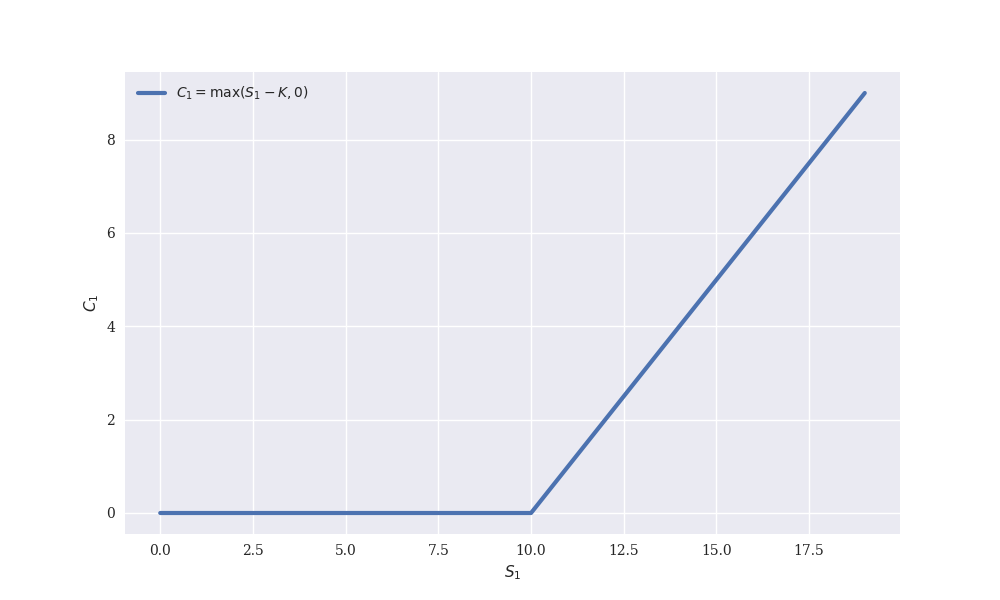

In [14]:
S1 = np.arange(20) # Possible values of the underlying asset

K = 10 # Option strike price

C1 = np.maximum(S1 - K, 0) # Calculating vectorized payout

%matplotlib widget

from pylab import mpl, plt # Pylab is a convenience module that bulk imports matplotlib and pyplot
plt.style.use("seaborn")
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["savefig.dpi"] = 300  # Sets the default plot size

plt.figure(figsize=(10, 6))
plt.plot(S1, C1, lw=3.0, label="$C_1 = \max(S_1 - K, 0)$") # Plots underlying asset price on X, option payoff on Y.
plt.legend(loc=0) # places the legend with label defined above
plt.xlabel('$S_1$')
plt.ylabel('$C_1$')


**Replication** - [Replication](https://en.wikipedia.org/wiki/Replicating_portfolio) is an attribute of a contingent asset such that its payouts mirror--or are thusly redundant to--their underlying asset or a set of assets. Mathematically, the contingent claim is redundant if it is *linearly dependent* to other assets. 

The payoff to a call option is said to be redundant if a solution exists to the following problem:

$b \cdot \begin{pmatrix} B_1 \\ B_1 \end{pmatrix} + s \cdot \begin{pmatrix} S_1^u \\ S_1^d \end{pmatrix} = \begin{pmatrix} C_1^u \\ C_1^d \end{pmatrix}$, where $b, s \in \mathbb{R}$ and $B_1$ is the price of a bond at the time of payout.

This problem can be represented as a *system of linear equations*:

$\begin{cases} b \cdot B_1 + s \cdot S_1^u = C_1^u \\ b \cdot B_1 + s \cdot S_1^d = C_1^d \end{cases}$

The solutions are given by:

$\large s^* = \frac{C_1^u - C_1^d}{S_1^u - S_1^d}$

$\large b^* = \frac{1}{B_1} \times \frac{(C_1^d \times S_1^u) - (C_1^u \times S_1^d)}{S_1^u - S_1^d}$

Assume that a risk-less bond $B = (10,11)$ and a risky stock $S = (10, (20, 5)^T)$ exist on the market, and that contingent asset has a strike price $K = 15$, such that its payout $C_1 = (5,0)^T$. Plugging this data into the equations above, then, we get:

$\large s^* = \frac{5 - 0}{20 - 5} = \frac{1}{3}$

$\large b^* = \frac{1}{11} \times \frac{(0 \times 20) - (5 \times 5)}{20 - 5} = \frac{-25}{165} = \frac{-5}{33}$

Thusly, selling $\frac{5}{33}$ of the bond and buying $\frac{1}{3}$ of the stock perfectly replicates the behavior of the call option, and the option is linearly dependent on the payoff vectors of the two underlying assets. 

It's worth noting that technically *short selling* implies borrowing $n$ units of the
financial asset today from another agent and at once selling the units in the mar‐
ket. In one year, the borrowing agent buys $n$ of units of the financial
asset back in the market at the then-current price and transfers them back to the
other agent.

The replication problem can also be represented using matrices. Consider a square matrix $\mathcal{M}$ with four elements each representing the payoff vectors for the bond and stock across a state space:

$\mathcal{M} = \begin{pmatrix} B_1 & S^u_1 \\ B_1 & S^d_1 \end{pmatrix} $

The replication problem can thus be represented in *Matrix Form* as $\mathcal{M} \cdot \phi = C_1$, where $\phi \in \mathbb{R}^2$ is the vector containing the bond and stock portfolio positions for replication. 

**Arbitrage Pricing**

**Market Completeness**

**Arrow-Debreu Securities**

**Martingale Pricing**

**First Fundamental Theorem of Asset Pricing**

**Pricing By Expectation** 

**Second Fundamental Theorem of Asset Pricing**

**Means-Variance Portfolios**